# ECE219 Porject 1
#<br>Team: Haopeng Wang 405540751, Yue Yang 905592115

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
!pip install umap-learn
import umap.umap_ as umap

np.random.seed(42)
random.seed(42)






drive.mount('/content/drive')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 265.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c0810f8ec07148aefe43432add331b1b185828f757d76453a861d754725d5c00
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
Mounted at /content/drive


# Q1.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ECE219/HW1/Project1-ClassificationDataset.csv')
num_rows, num_columns = df.shape
print(num_rows,num_columns)

3476 8


It has 3476 rows and 8 columns

In [ ]:
df

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,'Personalize Your NBA App Experience for the '...,'Personalize Your NBA App Experience for the '...,"['original', 'content', 'live', 'slate', 'game...",NaN,['Official Release'],https://www.nba.com/news/nba-app-new-features-...,basketball,sports
1,'Mike Will attends the Pre-GRAMMY Gala and GRA...,'Mike WiLL Made-It has secured a partnership w...,"['lead', 'espn', 'nbas', 'madeit', 'nba', 'lat...",2023-10-18 16:22:29+00:00,['Marc Griffin'],https://www.vibe.com/news/entertainment/mike-w...,basketball,sports
2,'The Golden State Warriors are struggling to f...,'The Golden State Warriors are struggling to f...,"['insider', 'york', 'thing', 'nbc', 'tag', 'nb...",NaN,[],https://www.nbcnewyork.com/tag/featured-nba/,basketball,sports
3,"'On Nov. 28, the NBA and Nike will collaborate...","'On Nov. 28, the NBA and Nike will collaborate...","['watch', 'telecast', 'ultimate', 'membership'...",NaN,['Official Release'],https://www.nba.com/news/watch-nba-games-ultim...,basketball,sports
4,'The NBA announced additions and innovations t...,'The NBA announced additions and innovations t...,"['experience', 'bring', 'media', 'crennan', 'n...",2023-10-17 12:00:17+00:00,"['Chris Novak', 'About Chris Novak']",https://awfulannouncing.com/tech/nba-app-2023-...,basketball,sports
...,...,...,...,...,...,...,...,...
3471,'The Virginia Department of Forestry continues...,'The Virginia Department of Forestry continues...,"['forest', 'emergency', 'fueling', 'delayed', ...",2023-11-09 20:43:12+00:00,"['Crystal Graham', 'View All Posts Crystal Gra...",https://augustafreepress.com/news/lack-of-rain...,heatwave,climate
3472,'State Alabama Alaska Arizona Arkansas Califor...,'State Alabama Alaska Arizona Arkansas Califor...,"['south', 'forces', 'west', 'washington', 'isl...",NaN,['Rick Steelhammer Rsteelhammer Hdmediallc.Com...,https://www.wvgazettemail.com/news/forest-fire...,heatwave,climate
3473,'Chengdu showcases technological strength at h...,'Chengdu showcases technological strength at h...,"['strength', 'sichuan', 'institute', 'transfor...",NaN,[],http://www.itnewsonline.com/PRNewswire/Chengdu...,heatwave,climate
3474,"'Bluefield, WV (24701)\n\nToday\n\nPartly clou...","'Bluefield, WV (24701)TodayPartly cloudy skies...","['valley', 'evening', '26f', 'steep', 'skies',...",NaN,"['Steve Keenan', 'Skeenan Register-Herald.Com'...",https://www.bdtonline.com/news/steep-valley-fi...,heatwave,climate


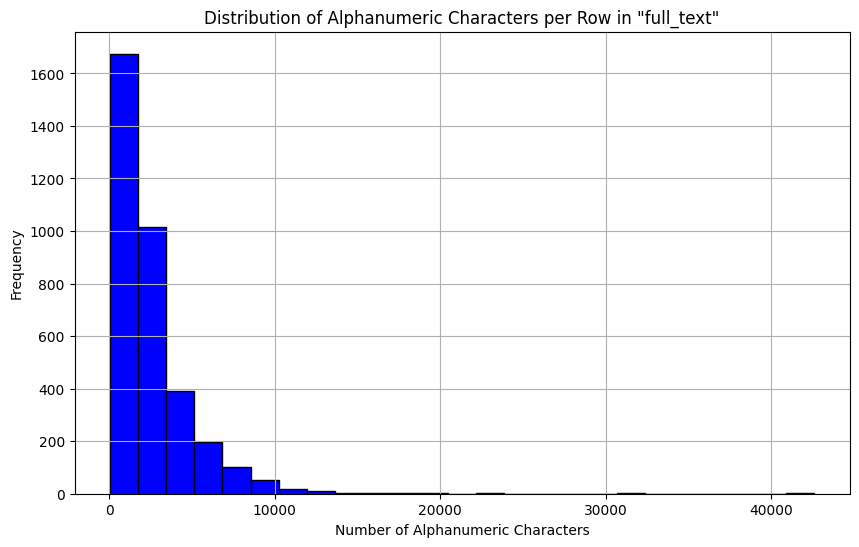

In [ ]:
df['alphanumeric_count'] = df['full_text'].apply(lambda x: sum(c.isalnum() for c in str(x)))

# Plotting the histogram of the alphanumeric counts
plt.figure(figsize=(10, 6))
plt.hist(df['alphanumeric_count'],bins=25, color='blue', edgecolor='black')
plt.xlabel('Number of Alphanumeric Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Alphanumeric Characters per Row in "full_text"')
plt.grid(True)
plt.show()


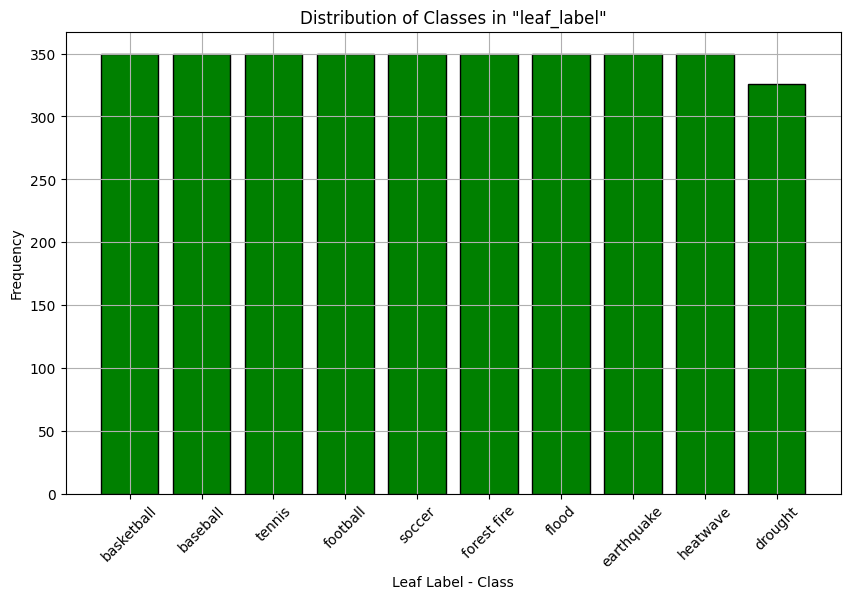

In [ ]:
leaf_label_counts = df['leaf_label'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(leaf_label_counts.index, leaf_label_counts.values, color='green', edgecolor='black')
plt.xlabel('Leaf Label - Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in "leaf_label"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



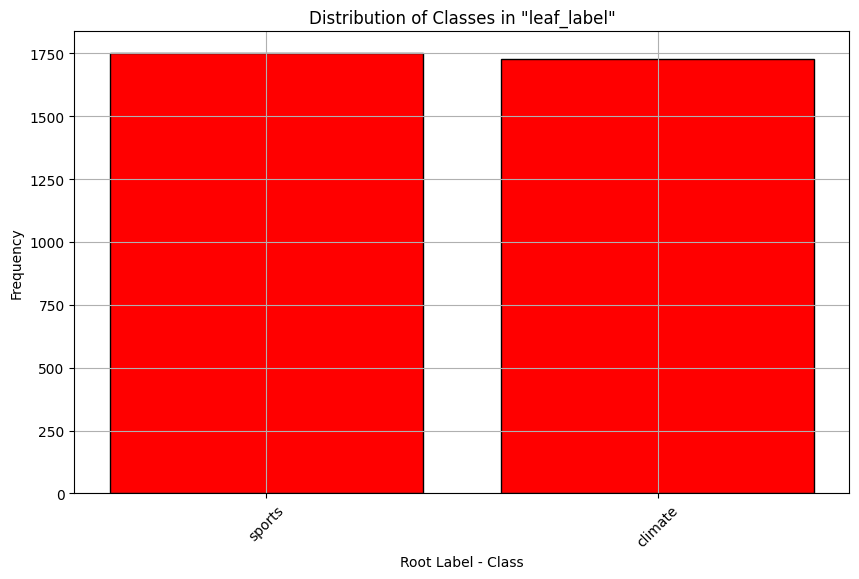

In [ ]:
root_label_counts = df['root_label'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(root_label_counts.index, root_label_counts.values, color='red', edgecolor='black')
plt.xlabel('Root Label - Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in "leaf_label"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Q1.3

G1:Most rows in full_text column have 400-1700 characters with some outliers above 20000 characters.

<br>G2: Leaf labels have 10 categories, half of them are sports and the other half are natural disasters. All the leaf_labels have frequency of 350 except for the "drought" with less frequency of 326.

<br>G3: Leaf labels have two categores, sports and climates. Each have similar numbers around 1750.

# Q2.

In [ ]:
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)
print('training sample size:' , train.shape[0])
print('testing sample size:' , test.shape[0])

training sample size: 2780
testing sample size: 696


In [ ]:
print(train)

                                              full_text root_label
2732  'A 6.5-magnitude earthquake struck Russia on T...    climate
2255  'This water vapor satellite image shows an atm...    climate
1257  'CBS Essentials is created independently of th...     sports
1531  'FIFA and Qatar Airways have renewed their spo...     sports
582   'The first phase to revamp the parking and sto...     sports
...                                                 ...        ...
2524  'Preparedness for a 7.5 magnitude earthquake b...    climate
2851  'California has been declared drought-free aft...    climate
1031  'On a Tuesday morning in late August, Rosemary...     sports
1135  'M. Anthony Nesmith/Icon Sportswire via Getty ...     sports
2259  'COATESVILLE — For the city, residents remembe...    climate

[2780 rows x 2 columns]


# Q3.

In [ ]:
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"", texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u ', " you ", texter)
    texter = re.sub('`', "", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    clean_regex = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean_regex, '', texter)
    if texter == "":
        texter = ""
    return texter

In [ ]:
# Map POS tag to first character lemmatize() accepts

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)



In [ ]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#define tokenization function
def sentence(text):
  sentences = sent_tokenize(text)
  return sentences
def word(sentence):
  words = word_tokenize(sentence)
  return words


In [ ]:
#define lemmatization
def preprocess_text(words):
    lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]  # Lemmatize
    cleaned_words = [word for word in lemmatized if word.isalnum() and not word.isnumeric()]
    return ' '.join(cleaned_words)

In [ ]:
#preprocess
train['preprocessed_text'] = train['full_text'].apply(clean)
train['preprocessed_text'] = train['preprocessed_text'].apply(word)
train['preprocessed_text'] = train['preprocessed_text'].apply(preprocess_text)
test['preprocessed_text'] = test['full_text'].apply(clean)
test['preprocessed_text'] = test['preprocessed_text'].apply(word)
test['preprocessed_text'] = test['preprocessed_text'].apply(preprocess_text)


In [ ]:
print(train)

                                              full_text root_label  \
2732  'A 6.5-magnitude earthquake struck Russia on T...    climate   
2255  'This water vapor satellite image shows an atm...    climate   
1257  'CBS Essentials is created independently of th...     sports   
1531  'FIFA and Qatar Airways have renewed their spo...     sports   
582   'The first phase to revamp the parking and sto...     sports   
...                                                 ...        ...   
2524  'Preparedness for a 7.5 magnitude earthquake b...    climate   
2851  'California has been declared drought-free aft...    climate   
1031  'On a Tuesday morning in late August, Rosemary...     sports   
1135  'M. Anthony Nesmith/Icon Sportswire via Getty ...     sports   
2259  'COATESVILLE — For the city, residents remembe...    climate   

                                      preprocessed_text  
2732  A earthquake struck Russia on Thursday Decembe...  
2255  water vapor satellite image show an a

In [ ]:
#vectorize via bag of word and TFIDF
Basic_vectorizer = CountVectorizer(stop_words='english',min_df = 3)
basic_bow_train = Basic_vectorizer.fit_transform(train['preprocessed_text'])
basic_bow_test = Basic_vectorizer.transform(test['preprocessed_text'])
TFIDF_vectorize = TfidfVectorizer(stop_words='english',min_df = 3)
TFIDF_train = TFIDF_vectorize.fit_transform(train['preprocessed_text'])
TFIDF_test = TFIDF_vectorize.transform(test['preprocessed_text'])



In [ ]:
print(TFIDF_train.shape)
print(TFIDF_test.shape)

(2780, 13846)
(696, 13846)


(1)
* Lemmatisation: larger dictionary
 * Pros: Produces more accurate results because it considers the context and meaning of words; In information retrieval tasks, lemmatisation can lead to improved recall because it reduces words to their canonical forms; suitable for tasks that involve semantic analysis.
 * Cons: Computationally more intensive than stemming; It results in a larger dictionary compared to stemming because it retains more word forms.
* Stemming: smaller dictionary.
 * Pros: Computationally faster and less resource-intensive than lemmatisation; It usually results in a smaller dictionary because it aggressively removes suffixes.
 * Cons: It may result in less accurate word forms because it applies simple rules without considering the context; It may not be suitable for tasks that require precise semantic analysis; In information retrieval, it may reduce recall because it may not match documents with variations of words that are not reduced to the same stem.

(2) An incraese the df_min will result in the decrease of columns in Tf_IDF matrix.
<br>(3) Stop words should be removed after the lemmatization because words removal will cause the change in sentence structure. Thus, it may mislead the lemmatization as it process the sentence structure to classify words.Punctuation should be removed after lemmatization. For example, can't will be cant after the removal of punctuation, and it changed the meaning of the word.Number should be removed after lemmatization beacuse it will change the sentence structure and the meaning. Numbers are not involved in the lemmatization process, so it can be removed before or after the lemmatization
<br>(4) train:(2780, 13711)
test:(696, 13711)

# Q4.

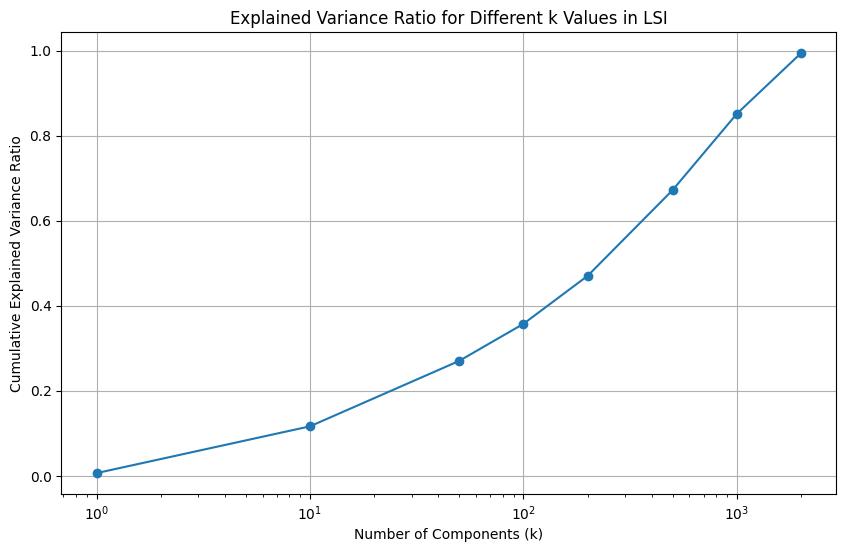

In [ ]:
k_values = [1, 10, 50, 100, 200, 500, 1000, 2000]
explained_var_ratios = []

for k in k_values:
    svd = TruncatedSVD(n_components=k, n_iter=10)
    svd.fit(TFIDF_train)
    explained_var_ratios.append(svd.explained_variance_ratio_.sum())

plt.figure(figsize=(10, 6))
plt.plot(k_values, explained_var_ratios, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio for Different k Values in LSI')
plt.xscale('log')  # Log scale for x-axis if k_values vary widely
plt.grid(True)
plt.show()


Q4.1: What does the plot's concavity suggest?

The plot is concave up, so the EVR is increasing as k is increasing.
The initial steep slope of the curve (from k = 1 to 10) suggests that adding a small number of components significantly improves the explained variance.
The flattening of the curve beyond k = 50 suggests that while additional components still contribute to explained variance, each new component adds less value compared to the initial components.

In [ ]:
k = 50
nmf = NMF(n_components=k, init='random')
TFIDF_train_NMF = nmf.fit_transform(TFIDF_train)  # This is your reduced training data matrix

H = nmf.components_

TFIDF_test_NMF = nmf.transform(TFIDF_test)

In [ ]:
k = 50
svd = TruncatedSVD(n_components=k,n_iter=10)

In [ ]:
k = 50
svd = TruncatedSVD(n_components=k,n_iter=10)
TFIDF_train_Reduced_LSI = svd.fit_transform(TFIDF_train)
TFIDF_test_Reduced_LSI = svd.transform(TFIDF_test)

NameError: name 'TFIDF_train' is not defined

In [ ]:
Train_reconstructed_lsi = TFIDF_train_Reduced_LSI @ svd.components_
mse_lsi = mean_squared_error(TFIDF_train.toarray(), Train_reconstructed_lsi)
print("MSE for LSI:", mse_lsi)


MSE for LSI: 5.109346659635472e-05


In [ ]:
Train_reconstructed_nmf = TFIDF_train_NMF @ H
mse_nmf = mean_squared_error(TFIDF_train.toarray(), Train_reconstructed_nmf)
print("MSE for NMF:", mse_nmf)



MSE for NMF: 5.176301674982352e-05


Q4.2: MSE for NMF is slightly larger because NMF method impose additional non-negative constraints to optimizer. NMF enforces non-negativity constraints on both the basis matrix and the encoding matrix. This constraint can limit the flexibility of NMF in approximating the original data.
In some cases, data may contain negative values or variations that cannot be perfectly captured by NMF without violating the non-negativity constraint. LSI may capture certain types of variance in the data more effectively due to its singular value decomposition (SVD) nature.

# Q5.

In [ ]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test, C_value):
    svm = LinearSVC( C=C_value)
    svm.fit(X_train, y_train)

    # Predictions
    y_pred = svm.predict(X_test)

    # Confusion Matrix and Performance Metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Determine the positive label (assuming 1 is the positive class)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Climate', 'Sports'], yticklabels=['Climate', 'Sports'])
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve
    y_scores = svm.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (C={C_value})')
    plt.legend(loc="lower right")
    plt.show()
    print("Confusion Matrix:\n", conf_matrix)
    print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1 Score: {f1}")


In [ ]:
y_train = train['root_label']
y_test = test['root_label']
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train['root_label'])
y_test_encoded = label_encoder.transform(test['root_label'])


Accuracy: 0.9281609195402298
Recall: 0.9913294797687862
Precision: 0.8794871794871795
F1 Score: 0.9320652173913043

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


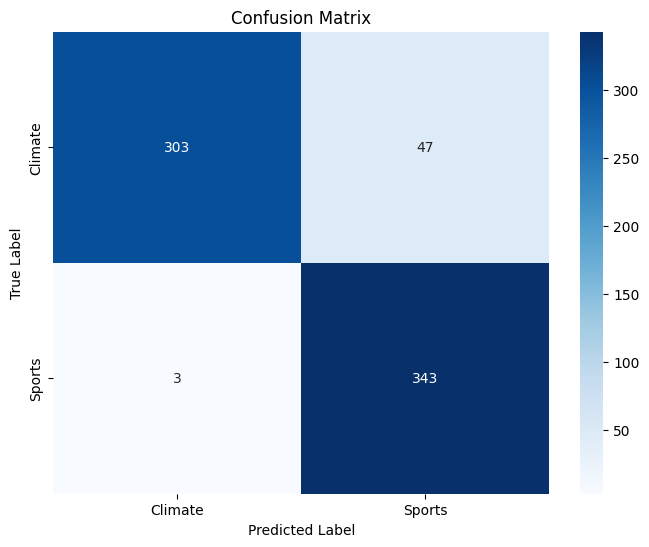

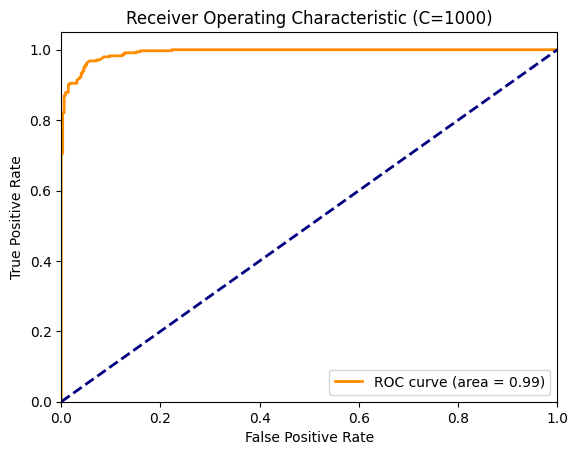

Confusion Matrix:
 [[303  47]
 [  3 343]]
Accuracy: 0.9281609195402298
Recall: 0.9913294797687862
Precision: 0.8794871794871795
F1 Score: 0.9320652173913043


In [ ]:
train_and_evaluate_svm(TFIDF_train_Reduced_LSI,y_train_encoded,TFIDF_test_Reduced_LSI,y_test_encoded,1000)

Accuracy: 0.8764367816091954
Recall: 0.9913294797687862
Precision: 0.8051643192488263
F1 Score: 0.8886010362694301

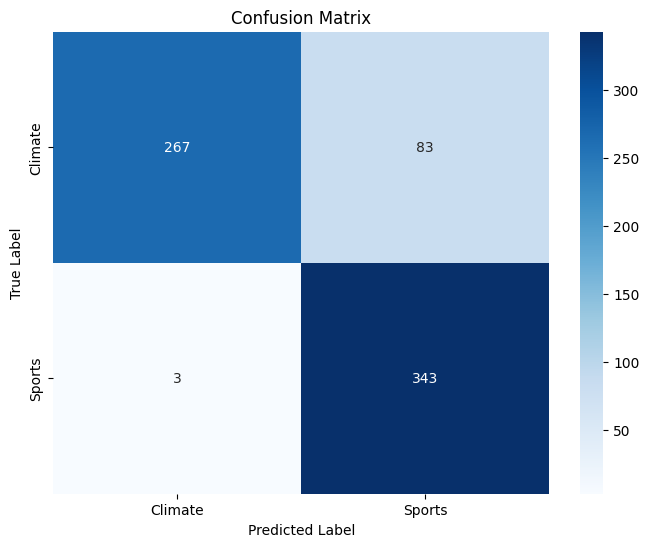

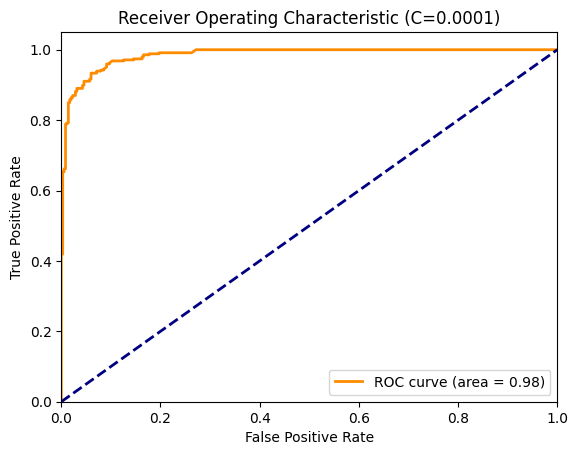

Confusion Matrix:
 [[267  83]
 [  3 343]]
Accuracy: 0.8764367816091954
Recall: 0.9913294797687862
Precision: 0.8051643192488263
F1 Score: 0.8886010362694301


In [ ]:
train_and_evaluate_svm(TFIDF_train_Reduced_LSI,y_train_encoded,TFIDF_test_Reduced_LSI,y_test_encoded,0.0001)


Accuracy: 0.9281609195402298
Recall: 0.9884393063583815
Precision: 0.8814432989690721
F1 Score: 0.9318801089918257

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


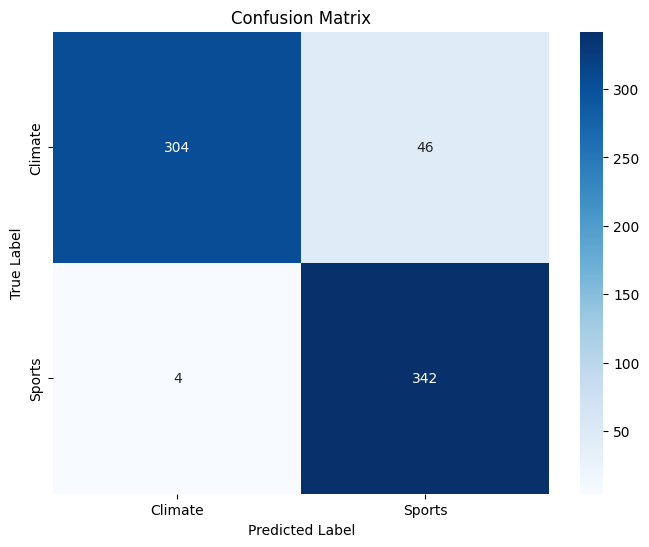

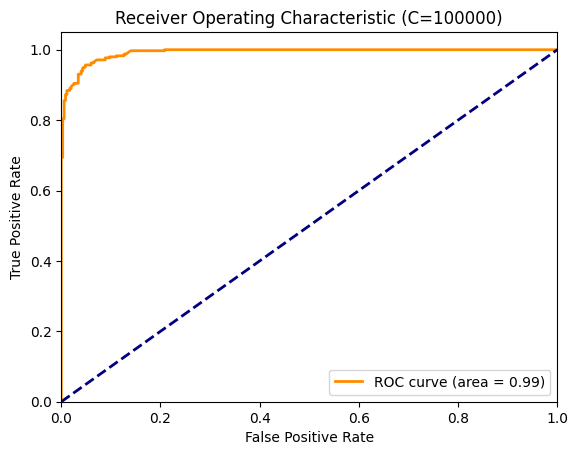

Confusion Matrix:
 [[304  46]
 [  4 342]]
Accuracy: 0.9281609195402298
Recall: 0.9884393063583815
Precision: 0.8814432989690721
F1 Score: 0.9318801089918257


In [ ]:
train_and_evaluate_svm(TFIDF_train_Reduced_LSI,y_train_encoded,TFIDF_test_Reduced_LSI,y_test_encoded,100000)

The hard margin SVM has better performance compared with the soft margin SVM.
The soft margin SVM achieve a much less accuracy score compared with hard hard margin because it has poor performance in predict climate label according to the confusion matrix Thus, the ROC curve is not accurate because it only relates to true positive rate and false negatiive rate.

In [ ]:
# Create a range of C values (you can adjust this range based on your needs)
C_range = np.logspace(-3, 6, num=10)  # Ranging from 10^(-3) to 10^3

# Define the parameter grid
param_grid = {'C': C_range}

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5)

# Create an SVC model with a linear kernel
svc =  LinearSVC()


# GridSearchCV to find the best C value
grid_search = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(TFIDF_train_Reduced_LSI, y_train_encoded)

# Best C value
best_C = grid_search.best_params_['C']

# Train the best model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

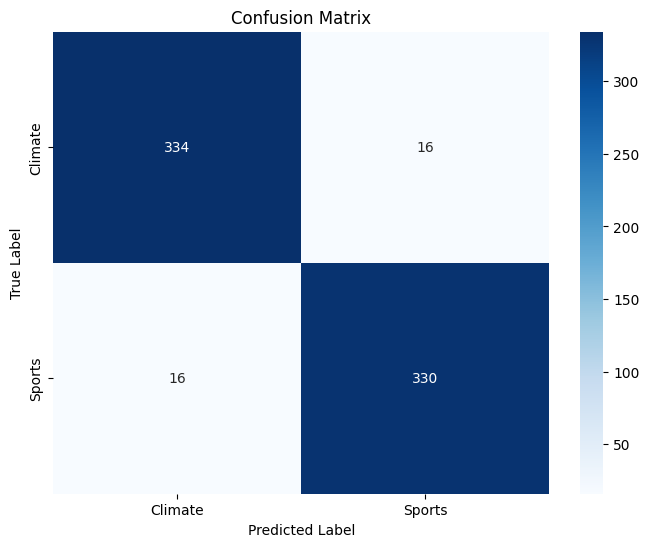

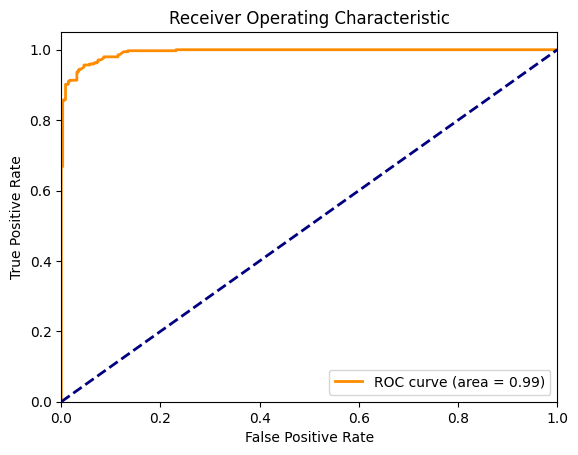

Best C: 10.0
Accuracy: 0.9540229885057471
Recall: 0.953757225433526
Precision: 0.953757225433526
F1 Score: 0.953757225433526


In [ ]:
best_svc =LinearSVC(C = best_C)
best_svc.fit(TFIDF_train_Reduced_LSI, y_train_encoded)

# Predictions and Evaluation
y_pred = best_svc.predict(TFIDF_test_Reduced_LSI)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
accuracy = accuracy_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# ROC Curve (if applicable)
y_scores = best_svc.decision_function(TFIDF_test_Reduced_LSI)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)
roc_auc = auc(fpr, tpr)
 # Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Climate', 'Sports'], yticklabels=['Climate', 'Sports'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the best C value and evaluation metrics
print(f"Best C: {best_C}")
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1 Score: {f1}")



# Q6

In [ ]:
def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test, C_value):
    log_reg = LogisticRegression(C=C_value, max_iter=10000)
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg.predict(X_test)

    # Confusion Matrix and Performance Metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC Curve
    y_scores = log_reg.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Climate', 'Sports'], yticklabels=['Climate', 'Sports'])
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plotting the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1 Score: {f1}")


Accuracy: 0.9497126436781609
Recall: 0.9479768786127167
Precision: 0.9507246376811594
F1 Score: 0.9493487698986977

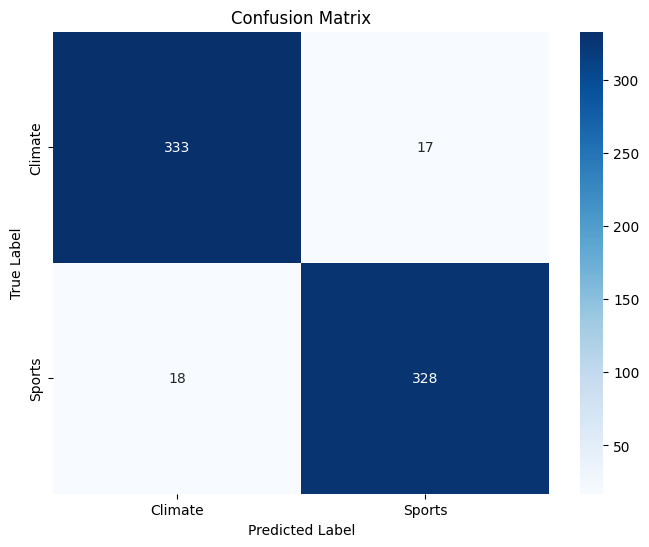

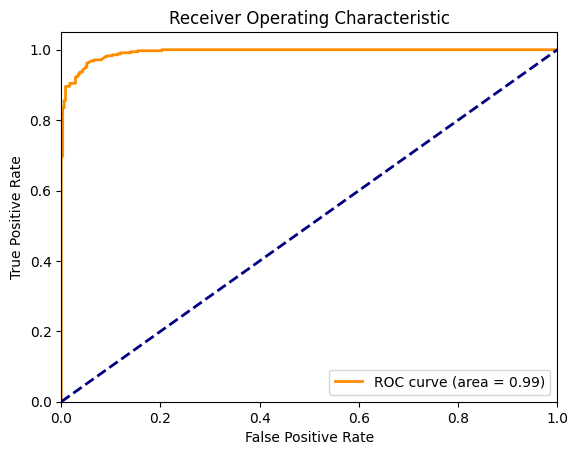

Accuracy: 0.9497126436781609
Recall: 0.9479768786127167
Precision: 0.9507246376811594
F1 Score: 0.9493487698986977


In [ ]:
train_and_evaluate_logistic_regression(TFIDF_train_Reduced_LSI,y_train_encoded,TFIDF_test_Reduced_LSI,y_test_encoded,10**15)


Best C for l1 regularization: 10.0,Best C for l2 regularization: 10.0



In [ ]:
C_range = np.logspace(-5, 5, 11)

# Perform grid search for L1 and L2 regularization
for penalty in ['l1', 'l2']:
    grid_search = GridSearchCV(
        LogisticRegression(penalty=penalty, solver='saga', max_iter=10000),
        param_grid={'C': C_range},
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(TFIDF_train_Reduced_LSI, y_train_encoded)

    # Best C value
    best_C = grid_search.best_params_['C']
    print(f"Best C for {penalty} regularization: {best_C}")

    # Mean test scores for each C value
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    for C, score in zip(C_range, mean_test_scores):
        print(f"C = {C}: Mean Test Score = {score}")

Best C for l1 regularization: 10.0
C = 1e-05: Mean Test Score = 0.5
C = 0.0001: Mean Test Score = 0.5014388489208633
C = 0.001: Mean Test Score = 0.5
C = 0.01: Mean Test Score = 0.5028776978417266
C = 0.1: Mean Test Score = 0.9258992805755396
C = 1.0: Mean Test Score = 0.95
C = 10.0: Mean Test Score = 0.9557553956834532
C = 100.0: Mean Test Score = 0.9550359712230216
C = 1000.0: Mean Test Score = 0.9553956834532373
C = 10000.0: Mean Test Score = 0.9553956834532373
C = 100000.0: Mean Test Score = 0.9553956834532373
Best C for l2 regularization: 10.0
C = 1e-05: Mean Test Score = 0.5028776978417266
C = 0.0001: Mean Test Score = 0.5028776978417266
C = 0.001: Mean Test Score = 0.8089928057553957
C = 0.01: Mean Test Score = 0.9392086330935252
C = 0.1: Mean Test Score = 0.9424460431654677
C = 1.0: Mean Test Score = 0.9496402877697842
C = 10.0: Mean Test Score = 0.9579136690647483
C = 100.0: Mean Test Score = 0.9553956834532376
C = 1000.0: Mean Test Score = 0.953956834532374
C = 10000.0: Mean 

No Regularization: {'accuracy': 0.9583333333333334, 'precision': 0.959349593495935, 'recall': 0.9619565217391305, 'f1': 0.960651289009498}
L1 Regularization: {'accuracy': 0.9626436781609196, 'precision': 0.9646739130434783, 'recall': 0.9646739130434783, 'f1': 0.9646739130434783}
<br>L2 Regularization: {'accuracy': 0.9540229885057471, 'precision': 0.9516129032258065, 'recall': 0.9619565217391305, 'f1': 0.9567567567567569}

In [ ]:
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Initialize classifiers
classifiers = {
    'No Regularization': LogisticRegression(C=1e12, penalty=None,solver='saga',max_iter=10000),
    'L1 Regularization': LogisticRegression(C=10, penalty='l1', solver='saga', max_iter=10000),
    'L2 Regularization': LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=10000)
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(TFIDF_train_Reduced_LSI, y_train_encoded)
    results[name] = evaluate_classifier(clf, TFIDF_test_Reduced_LSI, y_test_encoded)

# Display results
for name, metrics in results.items():
    print(f"{name}: {metrics}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


No Regularization: {'accuracy': 0.9583333333333334, 'precision': 0.959349593495935, 'recall': 0.9619565217391305, 'f1': 0.960651289009498}
L1 Regularization: {'accuracy': 0.9626436781609196, 'precision': 0.9646739130434783, 'recall': 0.9646739130434783, 'f1': 0.9646739130434783}
L2 Regularization: {'accuracy': 0.9540229885057471, 'precision': 0.9516129032258065, 'recall': 0.9619565217391305, 'f1': 0.9567567567567569}


The regularization parameter affects test error and learned coefficients in logistic regression. A higher regularization strength (lower C ) leads to simpler models by penalizing large coefficients, which can reduce overfitting and improve test error.

Interest in L1 regularization stems from its feature selection property, useful for models where interpretability and identifying significant features are important. L2 is favored for its ability to handle multicollinearity and model stability.

Logistic regression and linear SVM both find linear decision boundaries but differ in their approach. Logistic regression minimizes the logistic loss function, focusing on maximizing the likelihood of the data. Linear SVM minimizes hinge loss and focuses on maximizing the margin between classes.

Their performance might differ based on the data distribution, presence of outliers, and the margin between classes.

Paired t-test:

In [ ]:
df['preprocessed_text'] = df['full_text'].apply(clean)
df['preprocessed_text'] = df['preprocessed_text'].apply(word)
df['preprocessed_text'] = df['preprocessed_text'].apply(preprocess_text)

In [ ]:
svm_scores=[]
log_scores=[]

In [ ]:
#p value calculation
for i in range(10):
  train, test = train_test_split(df[["preprocessed_text","root_label"]], test_size=0.2)
  TFIDF_vectorize = TfidfVectorizer(stop_words='english',min_df = 3)
  TFIDF_train = TFIDF_vectorize.fit_transform(train['preprocessed_text'])
  TFIDF_test = TFIDF_vectorize.transform(test['preprocessed_text'])
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(train['root_label'])
  y_test_encoded = label_encoder.transform(test['root_label'])

  svm = LinearSVC(max_iter=10000)
  svm.fit(TFIDF_train, y_train_encoded)
  y_pred = svm.predict(TFIDF_test)
  svm_accuracy = accuracy_score(y_test_encoded, y_pred)
  svm_scores.append(svm_accuracy)

  log_reg = LogisticRegression(max_iter=10000)
  log_reg.fit(TFIDF_train, y_train_encoded)
  y_pred = log_reg.predict(TFIDF_test)
  log_accuracy = accuracy_score(y_test_encoded, y_pred)
  log_scores.append(log_accuracy)

In [ ]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel(svm_scores, log_scores)
print(p_value)

0.007696335249722142


I did 10 different times split of df and trained the both models. Then I did a t-test on the accuracy distributions of the two models. Since the p-value is less than 0.05, the difference is not statistically significant.

# Q7

Accuracy: 0.896551724137931
Recall: 0.9739884393063584
Precision: 0.8425
F1 Score: 0.9034852546916889

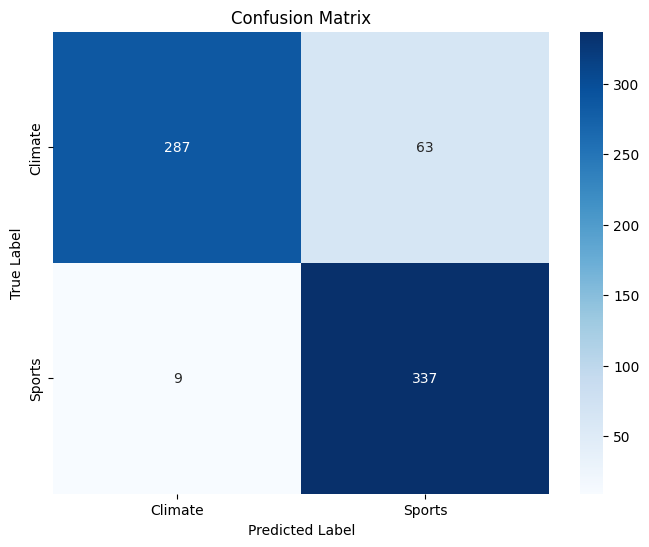

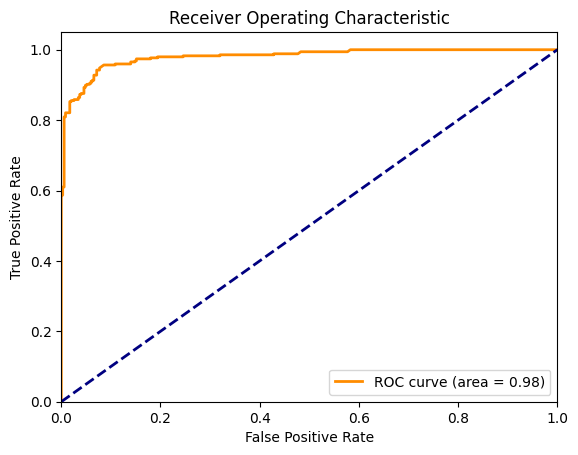

Accuracy: 0.896551724137931
Recall: 0.9739884393063584
Precision: 0.8425
F1 Score: 0.9034852546916889


In [ ]:
gnb = GaussianNB()
gnb.fit(TFIDF_train_Reduced_LSI, y_train_encoded)

# 2. Generate Predictions
y_pred = gnb.predict(TFIDF_test_Reduced_LSI)

# 3. Calculate Performance Metrics
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
accuracy = accuracy_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# 4. Plot the ROC Curve
# For ROC curve, you need the probabilities of the positive class
y_scores = gnb.predict_proba(TFIDF_test_Reduced_LSI)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Climate', 'Sports'], yticklabels=['Climate', 'Sports'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display the results
print(f"Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}\nF1 Score: {f1}")


# Q8

In [ ]:



# Stemming function and transformer
stemmer = PorterStemmer()

def word(sentence):
    # Tokenize the sentence into words
    return word_tokenize(sentence)

def preprocess_text_stemming(text):
    words = word(text)
    stemmed = [stemmer.stem(w) for w in words]
    cleaned_words = [word for word in stemmed if word.isalnum() and not word.isnumeric()]
    return ' '.join(cleaned_words)

In [ ]:
#prepare lemmatized data
grid1_train = train['full_text'].apply(clean)
grid1_train = grid1_train.apply(word)
grid1_train = grid1_train.apply(preprocess_text)


In [ ]:
grid1_test = test['full_text'].apply(clean)
grid1_test = grid1_test.apply(word)
grid1_test = grid1_test.apply(preprocess_text)

In [ ]:
#prepare stemmatized data
grid2_train = train['full_text'].apply(clean).apply(preprocess_text_stemming)
grid2_test = test['full_text'].apply(clean).apply(preprocess_text_stemming)  # Assuming 'test' is your test dataset


In [ ]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('dim_reduction', TruncatedSVD()),
    ('classifier', LinearSVC())
])

# Define the parameter grid
param_grid = {
    'vectorizer__min_df': [3, 5],
    'dim_reduction':[TruncatedSVD(n_components=5),TruncatedSVD(n_components=30),TruncatedSVD(n_components=80) , NMF(n_components=5),NMF(n_components=30),NMF(n_components=80)],
    'classifier': [LinearSVC(C = 10), LogisticRegression(penalty='l1',solver='liblinear',C=10,max_iter=10000),LogisticRegression(solver='lbfgs',C=10,max_iter=10000), GaussianNB()]
    # Replace best_gamma, penalty, and best_C with the values you've found earlier
}





NameError: name 'make_scorer' is not defined

In [ ]:
grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid1.fit(grid1_train, y_train_encoded)
results1 = pd.DataFrame(grid1.cv_results_)
results1['lemmatized'] = True
results1['clean'] = True

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
grid2 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid2.fit(grid2_train, y_train_encoded)
results2 = pd.DataFrame(grid2.cv_results_)
results2['lemmatized'] = False
results2['clean'] = True

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
pd.set_option('display.max_colwidth', None)  # or use a large number instead of None


In [ ]:
results = pd.concat([results1,results2])

# Best 5 combinators
top_5_results = results.sort_values(by='mean_test_score', ascending=False).head(5)
top_5_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_dim_reduction,param_vectorizer__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,lemmatized,clean
29,1.514924,0.087867,0.251916,0.002010,"LogisticRegression(C=10, max_iter=10000)",TruncatedSVD(n_components=80),5,"{'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}",0.964029,0.960432,0.965827,0.965827,0.956835,0.962590,0.003488,1,False,True
16,1.866257,0.402997,0.219140,0.055402,"LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear')",TruncatedSVD(n_components=80),3,"{'classifier': LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear'), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}",0.964029,0.962230,0.962230,0.965827,0.956835,0.962230,0.003010,1,True,True
28,1.802149,0.477150,0.282561,0.066608,"LogisticRegression(C=10, max_iter=10000)",TruncatedSVD(n_components=80),3,"{'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}",0.962230,0.960432,0.964029,0.969424,0.953237,0.961871,0.005262,2,False,True
5,1.555089,0.035986,0.194258,0.011622,LinearSVC(C=10),TruncatedSVD(n_components=80),5,"{'classifier': LinearSVC(C=10), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}",0.964029,0.958633,0.965827,0.969424,0.951439,0.961871,0.006272,2,False,True
4,1.842787,0.217723,0.234661,0.062269,LinearSVC(C=10),TruncatedSVD(n_components=80),3,"{'classifier': LinearSVC(C=10), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}",0.962230,0.958633,0.965827,0.964029,0.956835,0.961511,0.003336,2,True,True


# Performance on testing set


Combination 29: {'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}

Accuracy: 0.9511494252873564, Recall: 0.9450867052023122, Precision: 0.956140350877193, F1 Score: 0.9505813953488372

Combination 16: {'classifier': LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear'), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}

Accuracy: 0.9554597701149425, Recall: 0.9393063583815029, Precision: 0.9701492537313433, F1 Score: 0.9544787077826726

Combination 28: {'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}

Accuracy: 0.9468390804597702, Recall: 0.9364161849710982, Precision: 0.9557522123893806, F1 Score: 0.9459854014598541

Combination 5: {'classifier': LinearSVC(C=10), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}

Accuracy: 0.9540229885057471, Recall: 0.9450867052023122, Precision: 0.961764705882353, F1 Score: 0.9533527696793004

Combination 4: {'classifier': LinearSVC(C=10), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}

Accuracy: 0.9554597701149425, Recall: 0.9479768786127167, Precision: 0.9618768328445748, F1 Score: 0.9548762736535662

In [ ]:
for index, row in top_5_results[0:1].iterrows():
    # Reconfigure the pipeline with the parameters
    params = row['params']
    pipe.set_params(**params)

    # Retrain the pipeline
    pipe.fit(grid2_train, y_train_encoded)

    # Evaluate on the testing set
    y_pred = pipe.predict(grid2_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    print(f"Combination {index}: {params}")
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}\n")

for index, row in top_5_results[1:2].iterrows():
    # Reconfigure the pipeline with the parameters
    params = row['params']
    pipe.set_params(**params)

    # Retrain the pipeline
    pipe.fit(grid1_train, y_train_encoded)

    # Evaluate on the testing set
    y_pred = pipe.predict(grid1_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    print(f"Combination {index}: {params}")
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}\n")
for index, row in top_5_results[2:4].iterrows():
    # Reconfigure the pipeline with the parameters
    params = row['params']
    pipe.set_params(**params)

    # Retrain the pipeline
    pipe.fit(grid2_train, y_train_encoded)

    # Evaluate on the testing set
    y_pred = pipe.predict(grid2_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    print(f"Combination {index}: {params}")
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}\n")
for index, row in top_5_results[4:5].iterrows():
    # Reconfigure the pipeline with the parameters
    params = row['params']
    pipe.set_params(**params)

    # Retrain the pipeline
    pipe.fit(grid1_train, y_train_encoded)

    # Evaluate on the testing set
    y_pred = pipe.predict(grid1_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    print(f"Combination {index}: {params}")
    print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}\n")


Combination 29: {'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}
Accuracy: 0.9511494252873564, Recall: 0.9450867052023122, Precision: 0.956140350877193, F1 Score: 0.9505813953488372

Combination 16: {'classifier': LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='liblinear'), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}
Accuracy: 0.9554597701149425, Recall: 0.9393063583815029, Precision: 0.9701492537313433, F1 Score: 0.9544787077826726

Combination 28: {'classifier': LogisticRegression(C=10, max_iter=10000), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 3}
Accuracy: 0.9468390804597702, Recall: 0.9364161849710982, Precision: 0.9557522123893806, F1 Score: 0.9459854014598541

Combination 5: {'classifier': LinearSVC(C=10), 'dim_reduction': TruncatedSVD(n_components=80), 'vectorizer__min_df': 5}
Accuracy: 0.9540229885057471, Recall: 0.945086705202

# Q9

In [ ]:
#create training and testing set
train_leaf, test_leaf = train_test_split(df[["full_text","leaf_label"]], test_size=0.2)
print('training sample size:' , train_leaf.shape[0])
print('testing sample size:' , test_leaf.shape[0])

training sample size: 2780
testing sample size: 696


In [ ]:
#data preprocess
train_leaf['preprocessed_text'] = train_leaf['full_text'].apply(clean)
train_leaf['preprocessed_text'] = train_leaf['preprocessed_text'].apply(word)
train_leaf['preprocessed_text'] = train_leaf['preprocessed_text'].apply(preprocess_text)
test_leaf['preprocessed_text'] = test_leaf['full_text'].apply(clean)
test_leaf['preprocessed_text'] = test_leaf['preprocessed_text'].apply(word)
test_leaf['preprocessed_text'] = test_leaf['preprocessed_text'].apply(preprocess_text)

In [ ]:
TFIDF_vectorize = TfidfVectorizer(stop_words='english',min_df = 3)
TFIDF_trainleaf = TFIDF_vectorize.fit_transform(train_leaf['preprocessed_text'])
TFIDF_testleaf = TFIDF_vectorize.transform(test_leaf['preprocessed_text'])

In [ ]:
k = 50
svd = TruncatedSVD(n_components=k,n_iter=10)
TFIDF_trainleaf_Reduced_LSI = svd.fit_transform(TFIDF_trainleaf)
TFIDF_testleaf_Reduced_LSI = svd.transform(TFIDF_testleaf)

In [ ]:
#map labels to numbers
map_row_to_class = {0:"basketball", 1:"baseball", 2:"tennis",
3:"football", 4:"soccer", 5:"forest fire", 6:"flood",
7:"earthquake", 8:"drought", 9:"heatwave"}
reversed_map_row_to_class = {v: k for k, v in map_row_to_class.items()}

print(reversed_map_row_to_class)

{'basketball': 0, 'baseball': 1, 'tennis': 2, 'football': 3, 'soccer': 4, 'forest fire': 5, 'flood': 6, 'earthquake': 7, 'drought': 8, 'heatwave': 9}


In [ ]:
train_leaf['label'] = train_leaf['leaf_label'].map(reversed_map_row_to_class)
test_leaf['label']= test_leaf['leaf_label'].map(reversed_map_row_to_class)

In [ ]:
ytrainleaf = train_leaf['label']
ytestleaf = test_leaf['label']

Naive Bayes Classifier


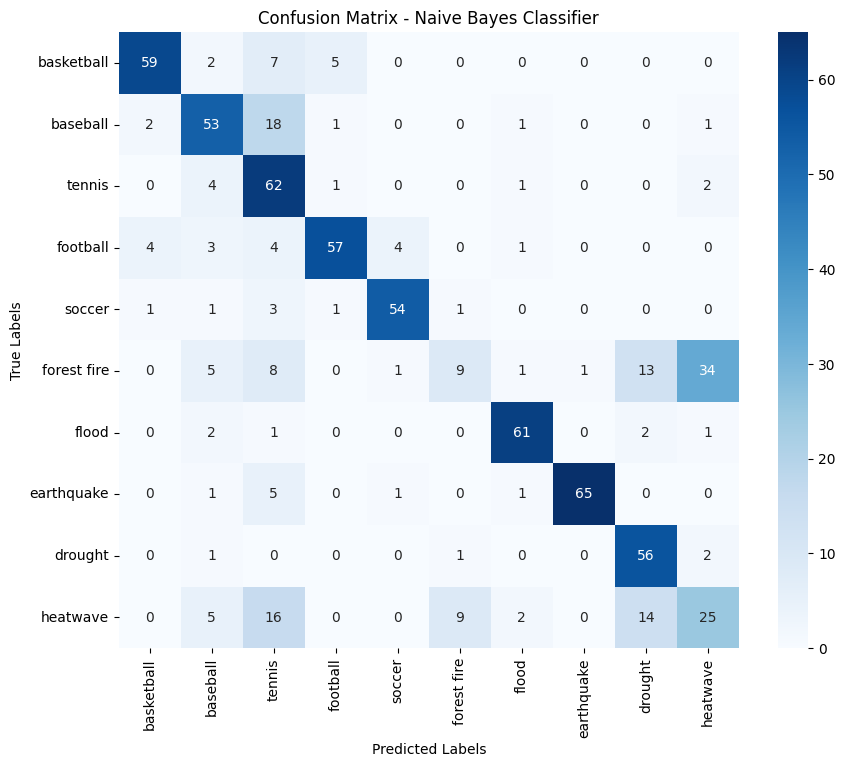

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        73
           1       0.69      0.70      0.69        76
           2       0.50      0.89      0.64        70
           3       0.88      0.78      0.83        73
           4       0.90      0.89      0.89        61
           5       0.45      0.12      0.20        72
           6       0.90      0.91      0.90        67
           7       0.98      0.89      0.94        73
           8       0.66      0.93      0.77        60
           9       0.38      0.35      0.37        71

    accuracy                           0.72       696
   macro avg       0.72      0.73      0.71       696
weighted avg       0.72      0.72      0.70       696



In [ ]:
gnb = GaussianNB()
gnb.fit(TFIDF_trainleaf_Reduced_LSI, ytrainleaf)
y_pred_nb = gnb.predict(TFIDF_testleaf_Reduced_LSI)

print("Naive Bayes Classifier")
cm = confusion_matrix(ytestleaf, y_pred_nb)


# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class.values(), yticklabels=map_row_to_class.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()
print(classification_report(ytestleaf, y_pred_nb))


Linear SVC One-vs-More Classifier


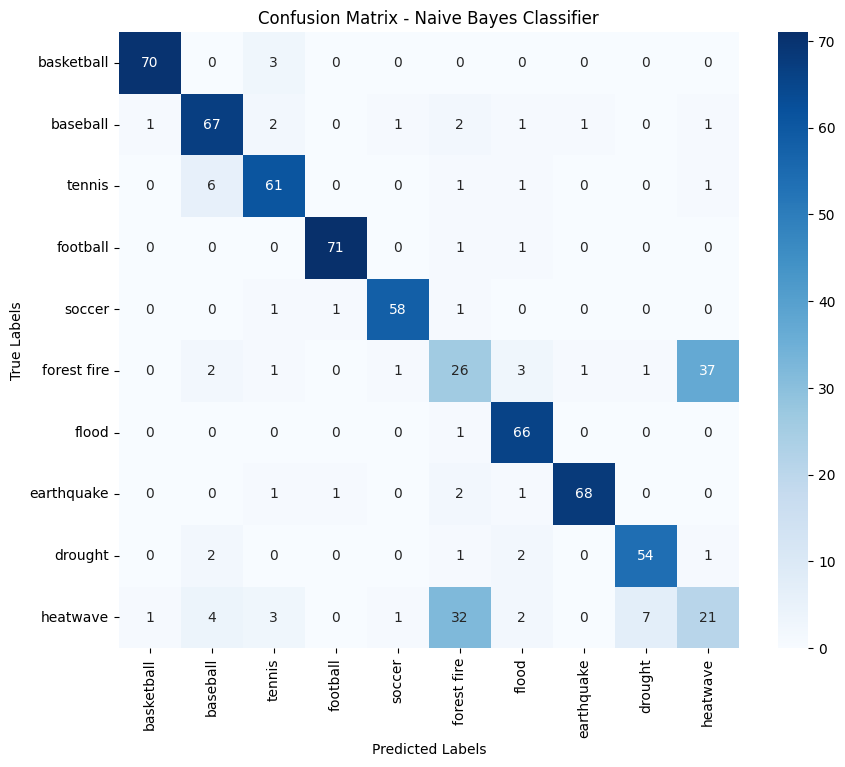

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.83      0.88      0.85        76
           2       0.85      0.87      0.86        70
           3       0.97      0.97      0.97        73
           4       0.95      0.95      0.95        61
           5       0.39      0.36      0.37        72
           6       0.86      0.99      0.92        67
           7       0.97      0.93      0.95        73
           8       0.87      0.90      0.89        60
           9       0.34      0.30      0.32        71

    accuracy                           0.81       696
   macro avg       0.80      0.81      0.80       696
weighted avg       0.80      0.81      0.80       696



In [ ]:
linear_svc_ovr = LinearSVC(C = 1, multi_class = 'ovr')
linear_svc_ovr.fit(TFIDF_trainleaf_Reduced_LSI, ytrainleaf)
y_pred_ovr = linear_svc_ovr.predict(TFIDF_testleaf_Reduced_LSI)
cm = confusion_matrix(ytestleaf, y_pred_ovr)

print("Linear SVC One-vs-More Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class.values(), yticklabels=map_row_to_class.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()
print(classification_report(ytestleaf, y_pred_ovr))



Linear SVC One-vs-One Classifier


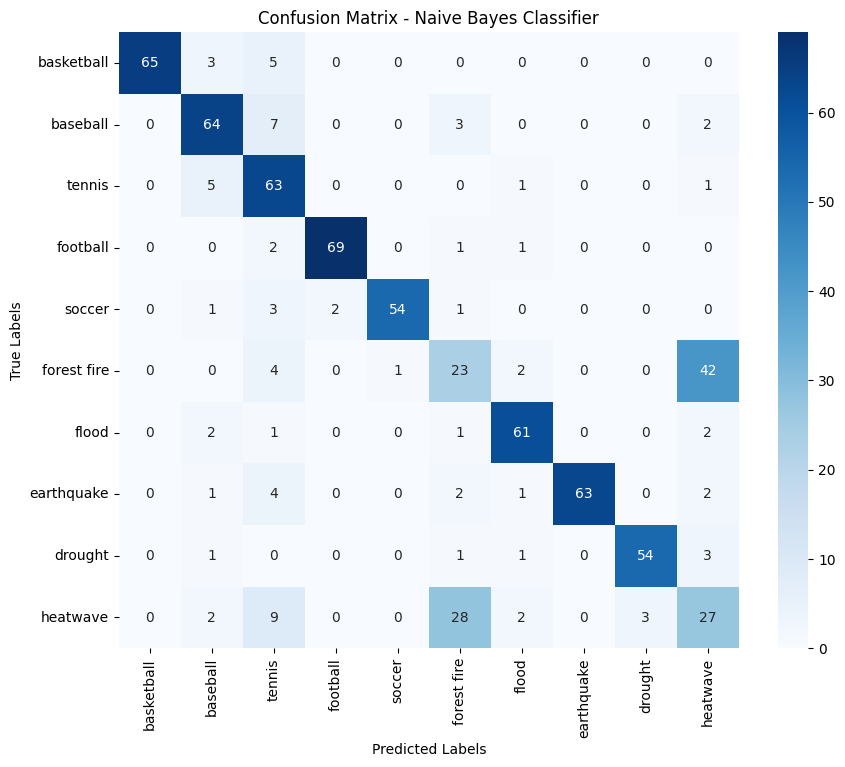

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        73
           1       0.81      0.84      0.83        76
           2       0.64      0.90      0.75        70
           3       0.97      0.95      0.96        73
           4       0.98      0.89      0.93        61
           5       0.38      0.32      0.35        72
           6       0.88      0.91      0.90        67
           7       1.00      0.86      0.93        73
           8       0.95      0.90      0.92        60
           9       0.34      0.38      0.36        71

    accuracy                           0.78       696
   macro avg       0.80      0.78      0.79       696
weighted avg       0.79      0.78      0.78       696



In [ ]:
svm_ovo = SVC(kernel='linear',C = 1,decision_function_shape = 'ovo')  # You can change the kernel if needed
svm_ovo.fit(TFIDF_trainleaf_Reduced_LSI, ytrainleaf)
y_pred_ovo = svm_ovo.predict(TFIDF_testleaf_Reduced_LSI)
cm = confusion_matrix(ytestleaf, y_pred_ovo)

print("Linear SVC One-vs-One Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class.values(), yticklabels=map_row_to_class.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()
print(classification_report(ytestleaf, y_pred_ovo))

1.For the confusion matrix, diagonal entries have large numbers whereas else entreis are very small.

2.Values on (forest,forest),(heatwave,heatwave) are relatively small compared to other diagonal entries. This indicate our model is not performing well in classifying texts with these two labels.

3.From observation, it seems the model has a hard time distingusihing text in forestfire and heatwave. Therefore, it's reasonable to combine these two labels. I named the combined label as heat as it describes the characteristics of forest fire and heatwave.

In [ ]:
#merge forest ffire and heat wave into heat
def merge_labels(label):
    if label in ['forest fire', 'heatwave']:
        return 'heat'
    else:
        return label

train_leaf['merged'] = train_leaf['leaf_label'].map(merge_labels)
test_leaf['merged'] = test_leaf['leaf_label'].map(merge_labels)

In [ ]:
#define new labels
map_row_to_class_merged = {0:"basketball", 1:"baseball", 2:"tennis",
3:"football", 4:"soccer", 5:"heat", 6:"flood",
7:"earthquake", 8:"drought"}
reversed_map_row_to_class_merged = {v: k for k, v in map_row_to_class_merged.items()}
reversed_map_row_to_class_merged

{'basketball': 0,
 'baseball': 1,
 'tennis': 2,
 'football': 3,
 'soccer': 4,
 'heat': 5,
 'flood': 6,
 'earthquake': 7,
 'drought': 8}

In [ ]:
#map accordingly
train_leaf['mergelabel'] = train_leaf['merged'].map(reversed_map_row_to_class_merged)
test_leaf['mergelabel']= test_leaf['merged'].map(reversed_map_row_to_class_merged)
y_trainleafmerged = train_leaf['mergelabel']
y_testleafmerged = test_leaf['mergelabel']

In [ ]:
svm_ovo = SVC(kernel='linear',C = 1,decision_function_shape = 'ovo')  # You can change the kernel if needed


In [ ]:
linear_svc_ovr = LinearSVC(C = 1, multi_class = 'ovr')
linear_svc_ovr.fit(TFIDF_trainleaf_Reduced_LSI, y_trainleafmerged)
y_pred_ovr = linear_svc_ovr.predict(TFIDF_testleaf_Reduced_LSI)
cm = confusion_matrix(y_testleafmerged, y_pred_ovr)
print("Linear SVC One-vs-More Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class_merged.values(), yticklabels=map_row_to_class_merged.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVC One-vs-More Classifier')
plt.show()
print(classification_report(y_testleafmerged, y_pred_ovr))

NameError: name 'TFIDF_trainleaf_Reduced_LSI' is not defined

Linear SVC One-vs-One Classifier


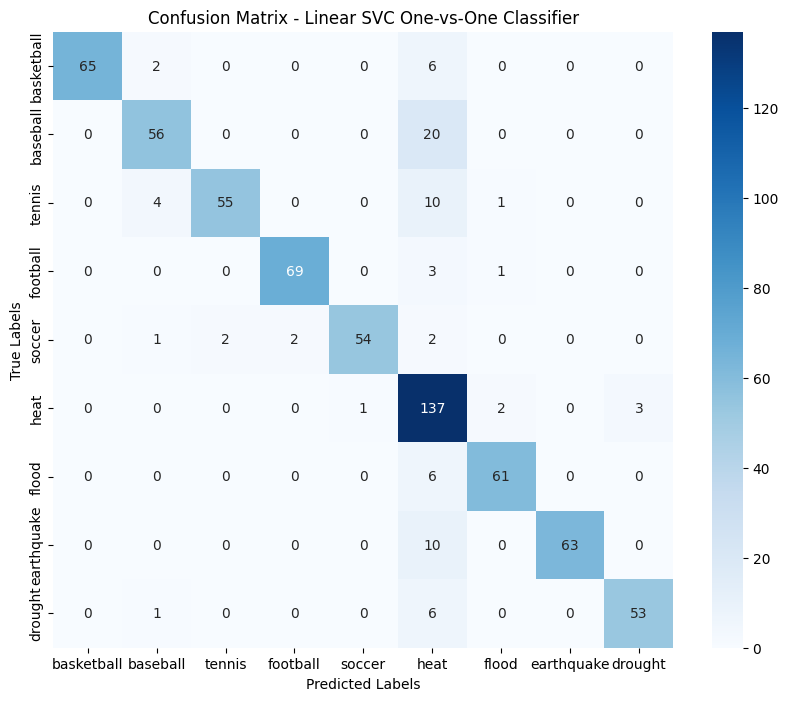

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        73
           1       0.88      0.74      0.80        76
           2       0.96      0.79      0.87        70
           3       0.97      0.95      0.96        73
           4       0.98      0.89      0.93        61
           5       0.69      0.96      0.80       143
           6       0.94      0.91      0.92        67
           7       1.00      0.86      0.93        73
           8       0.95      0.88      0.91        60

    accuracy                           0.88       696
   macro avg       0.93      0.87      0.90       696
weighted avg       0.90      0.88      0.88       696



In [ ]:
svm_ovo = SVC(kernel='linear',C = 1,decision_function_shape = 'ovo')  # You can change the kernel if needed
svm_ovo.fit(TFIDF_trainleaf_Reduced_LSI, y_trainleafmerged)
y_pred_ovo = svm_ovo.predict(TFIDF_testleaf_Reduced_LSI)
cm = confusion_matrix(y_testleafmerged, y_pred_ovo)

print("Linear SVC One-vs-One Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class_merged.values(), yticklabels=map_row_to_class_merged.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVC One-vs-One Classifier')
plt.show()
print(classification_report(y_testleafmerged, y_pred_ovo))

 The model is more favorable for the heat class as it's the majority in the training sample.From the covariance matrix, we can see many non-zero and large entries on the column of heat, meaning models can not accurately distinguish other leaf labels with heat. This imbalance problem could be solved by randomly decreasing the numbers of heat data in the training sample. The new training sample and test performace are shown below. We can see these is a signiificant improvement in accuracy according to the confusion matrix.

In [ ]:
category_counts = train_leaf['merged'].value_counts()
print(category_counts)

heat          568
basketball    292
baseball      287
flood         286
tennis        282
soccer        275
football      274
earthquake    268
drought       248
Name: merged, dtype: int64


In [ ]:
heat_rows = train_leaf[train_leaf['merged'] == 'heat']
rows_to_drop = heat_rows.sample(n=250)  # Adjust random_state for reproducibility
trainleaf_reduced = train_leaf.drop(rows_to_drop.index)
category_counts = trainleaf_reduced['merged'].value_counts()
category_counts
TFIDF_vectorize = TfidfVectorizer(stop_words='english',min_df = 3)
TFIDF_trainleafreduced = TFIDF_vectorize.fit_transform(trainleaf_reduced['preprocessed_text'])
TFIDF_testleafreduced = TFIDF_vectorize.transform(test_leaf['preprocessed_text'])
TFIDF_trainleaf_Reduced_LSI_Reduced = svd.fit_transform(TFIDF_trainleafreduced)
TFIDF_testleaf_Reduced_LSI_reduced = svd.transform(TFIDF_testleafreduced)
y_trainleafmerged_reduced = trainleaf_reduced['mergelabel']


In [ ]:
counts = trainleaf_reduced['merged'].value_counts()
counts

heat          368
basketball    292
baseball      287
flood         286
tennis        282
soccer        275
football      274
earthquake    268
drought       248
Name: merged, dtype: int64

Linear SVC One-vs-More Classifier


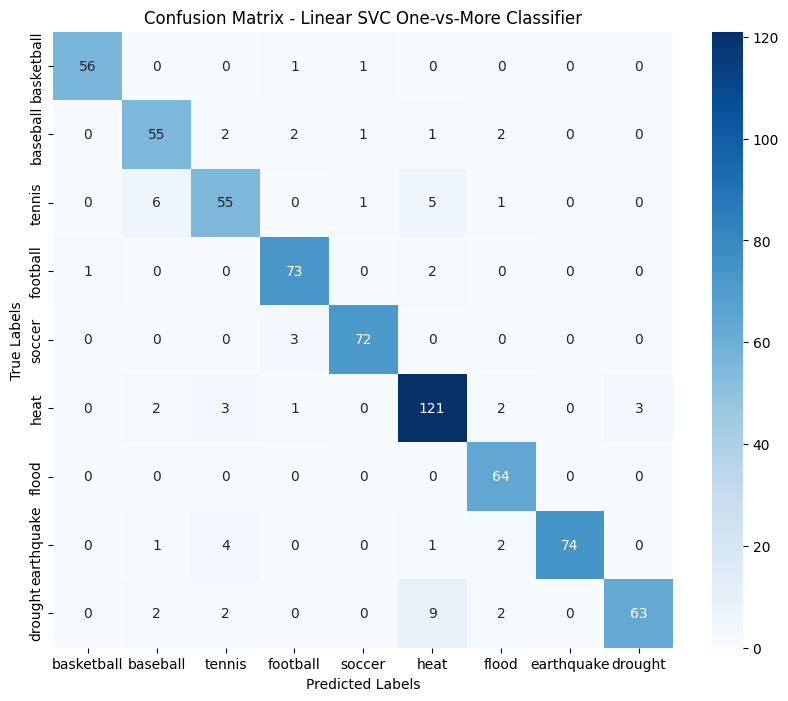

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.83      0.87      0.85        63
           2       0.83      0.81      0.82        68
           3       0.91      0.96      0.94        76
           4       0.96      0.96      0.96        75
           5       0.87      0.92      0.89       132
           6       0.88      1.00      0.93        64
           7       1.00      0.90      0.95        82
           8       0.95      0.81      0.88        78

    accuracy                           0.91       696
   macro avg       0.91      0.91      0.91       696
weighted avg       0.91      0.91      0.91       696



In [ ]:
linear_svc_ovr = LinearSVC(C = 1, multi_class = 'ovr')
linear_svc_ovr.fit(TFIDF_trainleaf_Reduced_LSI_Reduced, y_trainleafmerged_reduced)
y_pred_ovr = linear_svc_ovr.predict(TFIDF_testleaf_Reduced_LSI_reduced)
cm = confusion_matrix(y_testleafmerged, y_pred_ovr)
print("Linear SVC One-vs-More Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class_merged.values(), yticklabels=map_row_to_class_merged.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVC One-vs-More Classifier')
plt.show()
print(classification_report(y_testleafmerged, y_pred_ovr))

Linear SVC One-vs-One Classifier


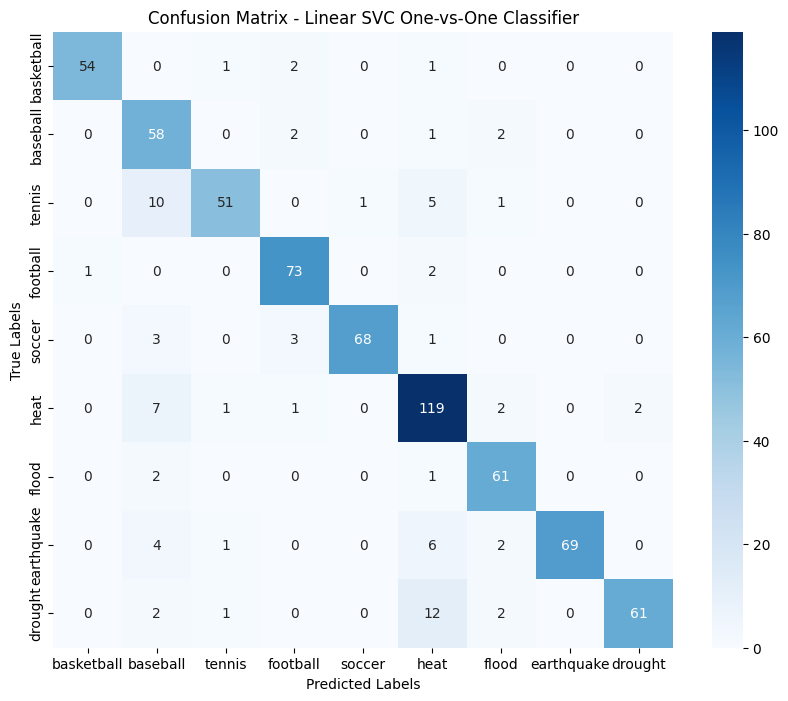

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.67      0.92      0.78        63
           2       0.93      0.75      0.83        68
           3       0.90      0.96      0.93        76
           4       0.99      0.91      0.94        75
           5       0.80      0.90      0.85       132
           6       0.87      0.95      0.91        64
           7       1.00      0.84      0.91        82
           8       0.97      0.78      0.87        78

    accuracy                           0.88       696
   macro avg       0.90      0.88      0.89       696
weighted avg       0.90      0.88      0.88       696



In [ ]:
svm_ovo = SVC(kernel='linear',C = 1,decision_function_shape = 'ovo')  # You can change the kernel if needed
svm_ovo.fit(TFIDF_trainleaf_Reduced_LSI_Reduced, y_trainleafmerged_reduced)
y_pred_ovo = svm_ovo.predict(TFIDF_testleaf_Reduced_LSI_reduced)
cm = confusion_matrix(y_testleafmerged, y_pred_ovo)

print("Linear SVC One-vs-One Classifier")
# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=map_row_to_class_merged.values(), yticklabels=map_row_to_class_merged.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVC One-vs-One Classifier')
plt.show()
print(classification_report(y_testleafmerged, y_pred_ovo))

# Q10

a) GloVe embeddings are trained on the ratio of co-occurrence probabilities rather than the probabilities themselves because ratios are better at distinguishing relevant from irrelevant words and discriminating between two relevant words. The ratio effectively cancels out noise from non-discriminative words, providing clearer differentiation based on contextual relationships.

b)In GloVe embeddings, the vector for "running" is same. GloVe focuses on global co-occurrence and might not capture subtle differences in local context. Thus, the embeddings might be similar unless the training corpus frequently presents "running" in these distinct contexts.

c)For GloVe vectors, the norm of differences like ||GLoVe["woman"] - GLoVe["man"]||2 would be smaller for pairs with other terms.

d)Lemmatization is more suitable than stemming.Lemmatization considers the context and converts words to their meaningful base forms, aligning better with GloVe's context-based learning approach.

# Q11

Procedure:
<br>1.split the testing and training set by 0.2 convention with column full text, keywords, and root_label. The training text data would be the combination of full text and keywords to improve the model accuracy.
<br>2.clean and tokenize the training and testing set.
<br>3.Using Glove to vectorize the training and testing set.
<br>4.Utilized singular value decomposition to reduce the data dimension to 50.

In [ ]:
embeddings_dict_300 = {}
dimension_of_glove = 300
with open("/content/drive/MyDrive/ECE219/HW1/glove.6B.300d.txt", 'r') as f: # if 'r' fails with unicode error, please use 'rb'
   for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict_300[word] = vector

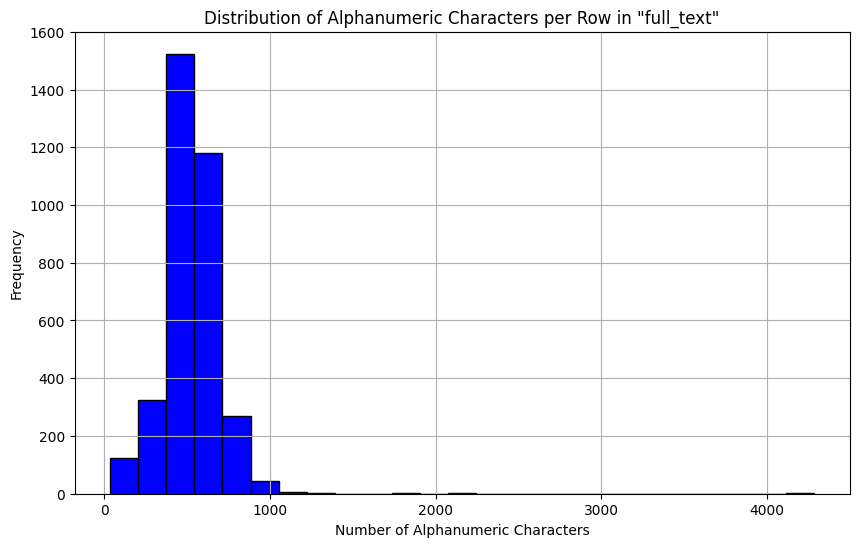

In [ ]:
df['alphanumeric_count2'] = df['summary'].apply(lambda x: sum(c.isalnum() for c in str(x)))

# Plotting the histogram of the alphanumeric counts
plt.figure(figsize=(10, 6))
plt.hist(df['alphanumeric_count2'],bins=25, color='blue', edgecolor='black')
plt.xlabel('Number of Alphanumeric Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Alphanumeric Characters per Row in "full_text"')
plt.grid(True)
plt.show()

In [ ]:
train_glove, test_glove = train_test_split(df[["full_text","root_label",'keywords']], test_size=0.2)


In [ ]:
def document_to_vec(doc,embeddings_dict , Dim=300):
    word_vectors = [embeddings_dict.get(word, np.zeros(Dim)) for word in doc]

    # Normalize each word's vector and handle zero division
    word_vectors = [vec / np.linalg.norm(vec) if np.linalg.norm(vec) > 0 else np.zeros(Dim) for vec in word_vectors]

    # Compute the mean of word vectors
    doc_vector = np.mean(word_vectors, axis=0) if word_vectors else np.zeros(Dim)
    return doc_vector

In [ ]:
train_glove['combine']= train_glove['full_text'] + train_glove['keywords']

In [ ]:
def sentence(text):
  sentences = sent_tokenize(text)
  return sentences
def word(sentence):
  words = word_tokenize(sentence)
  return words

train_glove['preprocessed'] = train_glove['combine'].apply(clean)
train_glove['preprocessed'] = train_glove['preprocessed'].apply(word)

test_glove['preprocessed'] = test_glove['full_text'].apply(clean)
test_glove['preprocessed'] = test_glove['preprocessed'].apply(word)

In [ ]:

train_vecs = np.array([document_to_vec(doc, embeddings_dict_300) for doc in train_glove['preprocessed']])
test_vecs = np.array([document_to_vec(doc, embeddings_dict_300) for doc in test_glove['preprocessed']])


In [ ]:
svd = TruncatedSVD(n_components=50,n_iter=10)
train_Reduced_LSI_glove = svd.fit_transform(train_vecs)
test_Reduced_LSI_glove = svd.transform(test_vecs)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
ytrain_glove = train_glove['root_label']
ytest_glove = test_glove['root_label']
y_trainglove_encoded = label_encoder.fit_transform(ytrain_glove)
y_testglove_encoded = label_encoder.transform(ytest_glove)

Accuracy: 0.9511494252873564
Recall: 0.947075208913649
Precision: 0.9577464788732394
F1 Score: 0.9523809523809523

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


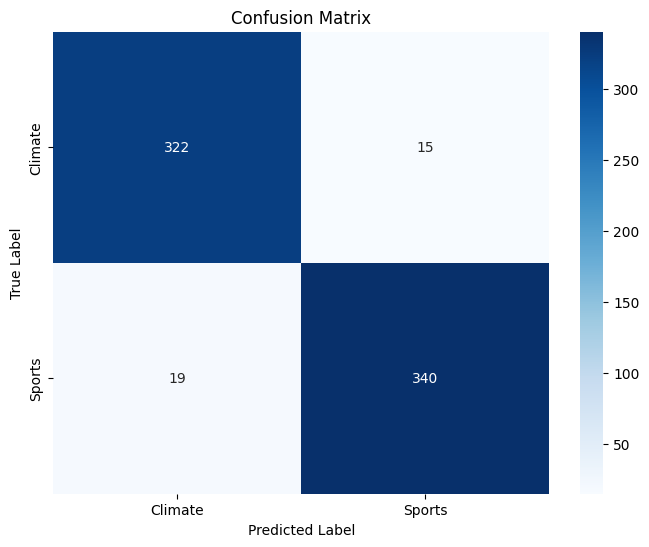

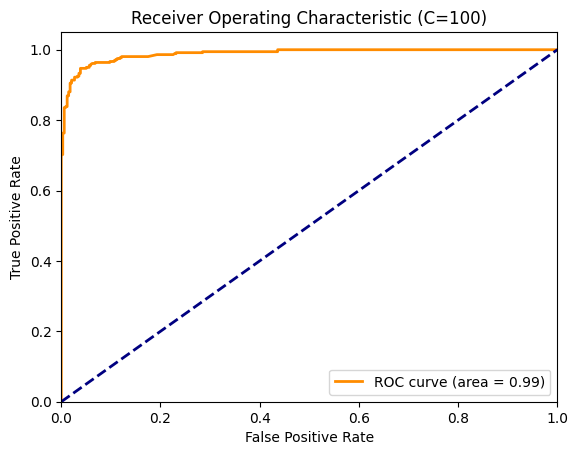

Confusion Matrix:
 [[322  15]
 [ 19 340]]
Accuracy: 0.9511494252873564
Recall: 0.947075208913649
Precision: 0.9577464788732394
F1 Score: 0.9523809523809523


In [ ]:
train_and_evaluate_svm(train_vecs, y_trainglove_encoded, test_vecs, y_testglove_encoded, 100)

# Q12

The accuracy increase as the dimension increase. This trend is expected because glove with higher dimension will use more parameters to vectorize words. This will result in more accurate vectorization of each words, thus improve the model performance.

In [ ]:
embeddings_dict_50 = {}
dimension_of_glove_50 = 50
with open("/content/drive/MyDrive/ECE219/HW1/glove.6B.50d.txt", 'r') as f: # if 'r' fails with unicode error, please use 'rb'
   for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict_50[word] = vector
embeddings_dict_100 = {}
dimension_of_glove_100 = 100
with open("/content/drive/MyDrive/ECE219/HW1/glove.6B.100d.txt", 'r') as f: # if 'r' fails with unicode error, please use 'rb'
   for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict_100[word] = vector
embeddings_dict_200 = {}
dimension_of_glove_100 = 200
with open("/content/drive/MyDrive/ECE219/HW1/glove.6B.200d.txt", 'r') as f: # if 'r' fails with unicode error, please use 'rb'
   for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict_200[word] = vector

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


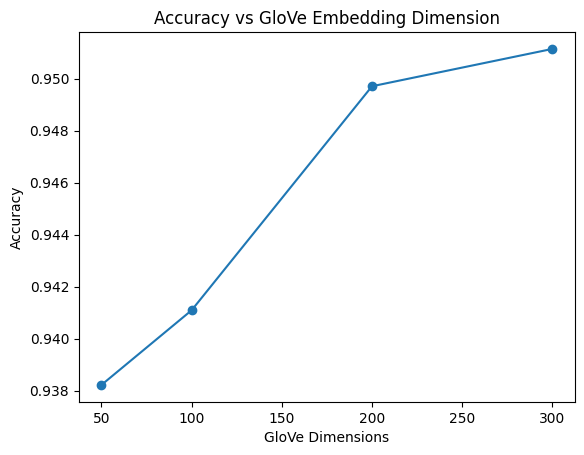

In [ ]:
glove_dimensions = [50, 100, 200, 300]
accuracies = []
embeddings_dicts = {
    50: embeddings_dict_50,
    100: embeddings_dict_100,
    200: embeddings_dict_200,
    300: embeddings_dict_300
}

for dim in glove_dimensions:
    # Load the GloVe embeddings of the specified dimension
    embeddings_dict = embeddings_dicts[dim]
    # Create document vectors

    train_vecs = np.array([document_to_vec(doc, embeddings_dict,Dim= dim) for doc in train_glove['preprocessed']])
    test_vecs = np.array([document_to_vec(doc, embeddings_dict,Dim = dim) for doc in test_glove['preprocessed']])

    # Train your classifier
    classifier = LinearSVC(C = 100)  # Example: using SVC
    classifier.fit(train_vecs, y_trainglove_encoded)

    # Evaluate the classifier
    y_pred = classifier.predict(test_vecs)
    accuracy = accuracy_score(y_testglove_encoded, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(glove_dimensions, accuracies, marker='o')
plt.xlabel('GloVe Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs GloVe Embedding Dimension')
plt.show()

# Q13

There are two clusters(or one primary cluster) formed in the glove graph graphs and one clusters formed in the random graph. If in fact there is only cluster in glove graph, the cluster in random graph is more symmetric and concentrated.

In [ ]:
dim = 300
num_docs =2780
random_vecs = np.random.rand(num_docs, dim)
normalized_random_vecs = random_vecs / np.linalg.norm(random_vecs, axis=1, keepdims=True)


In [ ]:
#create umap model for both random and glove
umap_model = umap.UMAP(n_components=2, random_state=42)
glove_umap = umap_model.fit_transform(train_vecs)
random_umap = umap_model.fit_transform(normalized_random_vecs)
plt.figure(figsize=(12, 6))


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-112-8489fec6f007>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(glove_umap[:, 0], glove_umap[:, 1], c='red', cmap='Spectral', s=5)
<ipython-input-112-8489fec6f007>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(random_umap[:, 0], random_umap[:, 1], c='red', cmap='Spectral', s=5)


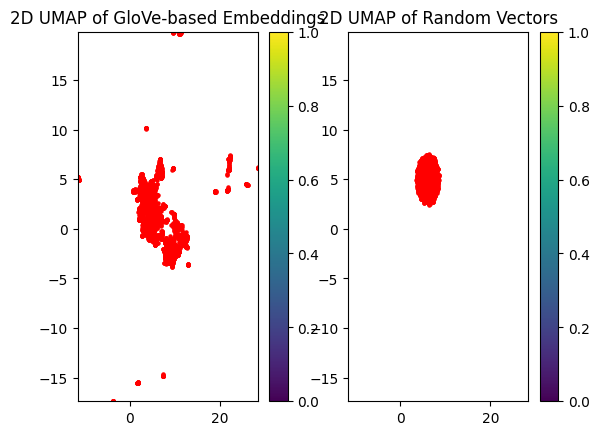

In [ ]:
#set axis boundary
x_limit = (min(glove_umap[:, 0].min(), random_umap[:, 0].min()),
           max(glove_umap[:, 0].max(), random_umap[:, 0].max()))
y_limit = (min(glove_umap[:, 1].min(), random_umap[:, 1].min()),
           max(glove_umap[:, 1].max(), random_umap[:, 1].max()))
#plot
plt.subplot(1, 2, 1)
plt.scatter(glove_umap[:, 0], glove_umap[:, 1], c='red', cmap='Spectral', s=5)
plt.colorbar()
plt.title('2D UMAP of GloVe-based Embeddings')
plt.xlim(x_limit)
plt.ylim(y_limit)
# Random vectors plot
plt.subplot(1, 2, 2)
plt.scatter(random_umap[:, 0], random_umap[:, 1], c='red', cmap='Spectral', s=5)
plt.colorbar()
plt.title('2D UMAP of Random Vectors')
plt.xlim(x_limit)
plt.ylim(y_limit)
plt.show()